<a target="_blank" href="https://colab.research.google.com/github/sonder-art/fdd_p25/blob/main/professor/numpy/notebooks/tarea_tiempos_numpy.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


### El proyecto se entrega en un pull-request en este documento directamente, que no sea del main branch sino de un branch llamado `proyecto_python`, y el titulo de pull reques `Proyecto Python`, se entrega antes del 6 de noviembre.

# Tarea/Proyecto — Tiempos con distintas estrategias (Python vs NumPy)

Objetivo: practicar varias formas de programar en Python y comparar su rendimiento con NumPy.

Qué harás:
- Implementar 3 problemas (P1 sencillo, P2 intermedio, P3 un poco más complejo).
- Para cada problema, crear 4 versiones: for, list comprehension, generator (yield/generador), y NumPy vectorizado.
- Medir tiempos con `timeit` de forma justa y compararlos.

Reglas mínimas:
- Verifica primero que todas las versiones producen el mismo resultado lógico (mismo tamaño/forma, mismos valores o valores equivalentes).
- Sé consistente: no mezcles listas y arreglos sin aclarar el formato final esperado.
- Para medir generadores, materializa con `list(...)` en el cronómetro para compararlo con las otras estrategias.
- No copies soluciones externas; escribe tu implementación.

Referencia: `07_Vectorizacion_vs_For_vs_Comprehensions.ipynb`.



In [16]:
# Instalación rápida (si la necesitas)

import numpy as np
import timeit


## Problema 1 — Escalar un vector por una constante

Descripción: dado un arreglo 1D `a` y una constante escalar `c`, produce una salida equivalente a `a * c`.

Requisitos:
- Entrada: `a` (1D), `c` (float/int).
- Salida: misma longitud que `a`, valores escalados por `c`.
- Mantén el tipo de salida consistente entre versiones (lista vs ndarray), o documenta la diferencia.

Implementa 4 versiones:
- for loop (acumula resultados con append)
- list comprehension
- generator (yield o expresión generadora)
- NumPy vectorizado

Datos sugeridos: `a = np.arange(n, dtype=float)`, `c = 2.0`.


In [6]:
# P1 — Stubs (completa las funciones)

def p1_for(a: np.ndarray, c: float):
    """Devuelve a*c usando for y append."""
    lista=[]
    for x in a:
        lista.append(x*c)
    return lista



def p1_comp(a: np.ndarray, c: float):
    """Devuelve a*c usando list comprehension."""
    return [x*c for x in a]
    


def p1_gen(a: np.ndarray, c: float):
    """Devuelve (como generador) a*c usando yield o gen expr."""
    return (x*c for x in a)


def p1_np(a: np.ndarray, c: float):
    """Devuelve a*c usando NumPy vectorizado."""
    return a * c


In [7]:
# P1 — Harness de tiempos (ajusta n y number)

def time_p1(n=100_000, number=5):
    a = np.arange(n, dtype=float)
    c = 2.0
    return (
        timeit.timeit(lambda: p1_for(a, c), number=number),
        timeit.timeit(lambda: p1_comp(a, c), number=number),
        timeit.timeit(lambda: list(p1_gen(a, c)), number=number),
        timeit.timeit(lambda: p1_np(a, c), number=number),
    )
print(time_p1())
a=np.arange(10)
print(p1_for(a, 3))
print(p1_comp(a, 3))
print(list(p1_gen(a, 3)))
print(p1_np(a, 3))



(0.109747205999156, 0.10253726800146978, 0.13814535299752606, 0.0004568069998640567)
[np.int64(0), np.int64(3), np.int64(6), np.int64(9), np.int64(12), np.int64(15), np.int64(18), np.int64(21), np.int64(24), np.int64(27)]
[np.int64(0), np.int64(3), np.int64(6), np.int64(9), np.int64(12), np.int64(15), np.int64(18), np.int64(21), np.int64(24), np.int64(27)]
[np.int64(0), np.int64(3), np.int64(6), np.int64(9), np.int64(12), np.int64(15), np.int64(18), np.int64(21), np.int64(24), np.int64(27)]
[ 0  3  6  9 12 15 18 21 24 27]


## Problema 2 — Suma de vecinos 1D (ventana)

Descripción: dado `a` (1D) y una ventana `k` impar (p. ej. 3), calcular `b[i]` como la suma de los `k` vecinos centrados en `i`.

Requisitos:
- Entrada: `a` (1D), `k` impar ≥ 3.
- Borde: puedes ignorar índices fuera de rango, recortar el resultado o replicar/extender bordes; explica tu elección.
- Salida: 1D; documenta si su longitud cambia por tu manejo de bordes.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (pistas: slicing con desplazamientos, `np.roll`, o una convolución simple).

Datos sugeridos: `a = np.arange(n, dtype=float)`, `k = 3`. 


In [8]:
# P2 — Stubs (completa las funciones)

def p2_for(a: np.ndarray, k: int = 3):
    """Devuelve suma de vecinos (1D) con for. Manejo de bordes a tu elección."""
    lista=[]
    for i in range(a.size):
        sum=0
        for j in range(i- (k // 2), i+ (k // 2)+1):
            if j<0:
                continue
            if j>=a.size:
                break
            sum=sum+a[j]
        lista.append(sum)
    return lista
            



def p2_comp(a: np.ndarray, k: int = 3):
    """List comprehension."""
    radio = (k // 2)
    N = len(a) 
    return [
        sum(
            a[j] 
            for j in range(i - radio, i + radio + 1)
            if 0 <= j < N
        )
        for i in range(N)
    ]
   


def p2_gen(a: np.ndarray, k: int = 3):
    """Generator (yield o gen expr)."""
    radio = k // 2
    N = len(a) 
    return (
        sum(
            a[j] 
            for j in range(i - radio, i + radio + 1)
            if 0 <= j < N
        )
        for i in range(N)
    )



def p2_np(a: np.ndarray, k: int = 3):
    """NumPy vectorizado (slicing/roll/convolución simple)."""
    
    kernel = np.ones(k, dtype=int)
    return np.convolve(a, kernel, mode='same')


In [9]:
# P2 — Harness de tiempos

def time_p2(n=100_000, number=3):
    a = np.arange(n, dtype=float)
    k = 3
    return (
        timeit.timeit(lambda: p2_for(a, k), number=number),
        timeit.timeit(lambda: p2_comp(a, k), number=number),
        timeit.timeit(lambda: list(p2_gen(a, k)), number=number),
        timeit.timeit(lambda: p2_np(a, k), number=number),
    )

time_p2()  # descomenta para probar

a=np.arange(5)
print(p2_for(a, 3))
print(p2_comp(a, 3))
print(list(p2_gen(a, 3)))
print(p2_np(a, 3))


[np.int64(1), np.int64(3), np.int64(6), np.int64(9), np.int64(7)]
[np.int64(1), np.int64(3), np.int64(6), np.int64(9), np.int64(7)]
[np.int64(1), np.int64(3), np.int64(6), np.int64(9), np.int64(7)]
[1 3 6 9 7]


## Problema 3 — Transformación no lineal y filtrado

Descripción: dado `a` (1D float), aplica una transformación no lineal y filtra con un umbral.

Requisitos:
- Transformación propuesta (de ejemplo): `np.sin(a) + a**2`.
- Entrada: `a` (1D float), `umbral` (float).
- Salida: colección con los elementos resultantes que superan `umbral`.
- Mantén clara la diferencia entre devolver lista vs ndarray.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (ufuncs + máscara booleana).

Datos sugeridos: `a = np.linspace(0, 1000, n)`, `umbral = 10.0`. 


In [10]:
# P3 — Stubs (completa las funciones)

def p3_for(a: np.ndarray, umbral: float):
    """Filtra tras transformación no lineal con for."""
    lista =[]
    for x in a:
        valor=np.sin(x) + x**2
        if valor > umbral:
            lista.append(valor)
    return lista



def p3_comp(a: np.ndarray, umbral: float):
    """List comprehension."""
    return [np.sin(x) + x**2 for x in a if (np.sin(x) + x**2) > umbral]



def p3_gen(a: np.ndarray, umbral: float):
    """Generator (yield o gen expr)."""

    return (np.sin(x) + x**2 for x in a if (np.sin(x) + x**2) > umbral)


def p3_np(a: np.ndarray, umbral: float):
    """NumPy vectorizado (ufuncs + máscara booleana)."""
    modificado= np.sin(a)+ a**2
    mascara= (modificado>umbral)
    return modificado [mascara]


In [11]:
# P3 — Harness de tiempos

def time_p3(n=200_000, number=3):
    a = np.linspace(0, 1000, n, dtype=float)
    umbral = 10.0
    return (
        timeit.timeit(lambda: p3_for(a, umbral), number=number),
        timeit.timeit(lambda: p3_comp(a, umbral), number=number),
        timeit.timeit(lambda: list(p3_gen(a, umbral)), number=number),
        timeit.timeit(lambda: p3_np(a, umbral), number=number),
    )

time_p3()  # descomenta para probar
a=np.arange(10)
print(p3_for(a, 3))
print(p3_comp(a, 3))
print(list(p3_gen(a, 3)))
print(p3_np(a, 3))


[np.float64(4.909297426825682), np.float64(9.141120008059866), np.float64(15.243197504692072), np.float64(24.04107572533686), np.float64(35.72058450180107), np.float64(49.65698659871879), np.float64(64.98935824662338), np.float64(81.41211848524176)]
[np.float64(4.909297426825682), np.float64(9.141120008059866), np.float64(15.243197504692072), np.float64(24.04107572533686), np.float64(35.72058450180107), np.float64(49.65698659871879), np.float64(64.98935824662338), np.float64(81.41211848524176)]
[np.float64(4.909297426825682), np.float64(9.141120008059866), np.float64(15.243197504692072), np.float64(24.04107572533686), np.float64(35.72058450180107), np.float64(49.65698659871879), np.float64(64.98935824662338), np.float64(81.41211848524176)]
[ 4.90929743  9.14112001 15.2431975  24.04107573 35.7205845  49.6569866
 64.98935825 81.41211849]


## Guardar resultados de tiempos en JSON (guía)

Motivación: conservar resultados de experimentos para compararlos más tarde (en otra sesión/equipo), graficarlos o compartirlos. JSON es legible, portable y fácil de procesar.

### Esquema sugerido de datos

- Nivel 1: metadatos del experimento (fecha/hora, versión de Python/NumPy, host, parámetros globales como `n` y `number`).
- Nivel 2: problemas y variantes (p1/p2/p3 y estrategias: for/comp/gen/numpy) con sus tiempos agregados.
- Recomendación: guardar mediana y desviación o percentiles; también puedes guardar el vector de repeticiones si lo necesitas.

```json
{
  "metadata": {
    "timestamp": "2025-10-23T12:34:56Z",
    "python_version": "3.10.12",
    "numpy_version": "2.1.1",
    "machine": "x86_64",
    "params": { "n": 100000, "number": 5 }
  },
  "results": {
    "p1": {
      "for":    { "s_per_call_median": 0.0281, "repetitions": 5 },
      "comp":   { "s_per_call_median": 0.0250, "repetitions": 5 },
      "gen":    { "s_per_call_median": 0.0312, "repetitions": 5 },
      "numpy":  { "s_per_call_median": 0.0004, "repetitions": 5 }
    },
    "p2": { "for": { "s_per_call_median": 0.041 } },
    "p3": { "numpy": { "s_per_call_median": 0.003 } }
  }
}
```

Notas:
- Usa claves en minúsculas y sin espacios para facilitar procesamiento.
- Si guardas vectores de tiempos por repetición, usa una clave adicional (por ejemplo `raw_times: [ ... ]`).
- Si diferencias por tamaño `n`, crea múltiples entradas o anida por `n` (p. ej. `results_by_n: {"1e4": {...}, "1e5": {...}}`).

### Organización de archivos

- Carpeta: `results/tiempos/` dentro del mismo directorio del notebook.
- Nombre de archivo: incluir fecha, problema o tamaño (p. ej., `tiempos_p123_n1e5_2025-10-23.json`).
- Evita sobreescribir: si vuelves a correr, genera un nuevo archivo con timestamp.

### Buenas prácticas al medir y guardar

- Medir varias repeticiones por variante; guardar la mediana (y opcionalmente percentiles como p10/p90) para robustez.
- Registrar parámetros que afectan el resultado: `n`, `number`, dtype, política de bordes en P2, etc.
- Guardar seeds o condiciones de entorno si hay aleatoriedad.
- Validar que los resultados lógicos son equivalentes antes de medir (mismo output).
- No mezclar E/S dentro de la sección medida; la E/S sesga los tiempos.

### Uso posterior

- Leer los JSON y comparar versiones/estrategias; graficar con `matplotlib`/`seaborn`.
- Automatizar reportes que lean todos los archivos de `results/tiempos/` y generen tablas comparativas.
- Mantener un historial temporal para ver regresiones o mejoras de rendimiento.



## Guía de medición y reporte

- Usa `timeit.timeit` con el mismo `number` de repeticiones para todas las versiones.
- Antes de medir, ejecuta cada función una vez (warm‑up) si tu entorno lo requiere.
- Reporta tiempos en una tabla simple o tupla por problema: `(for, comp, gen, numpy)`.
- Interpreta resultados: ¿qué versión gana?, ¿por cuánto?, ¿cambia con `n`?
- Evita medir al mismo tiempo código que imprime o muestra gráficos.

Sugerencia: prueba varios tamaños `n` (por ejemplo: 10^4, 10^5, 10^6) y observa tendencias.


In [15]:
import datetime, platform, sys, os

def estadisticas(vector_de_datos):
    """Calcula mediana, P25, P75 a partir de una lista de tiempos brutos."""
    times_array = np.array(vector_de_datos)
    return {
        "media": np.median(times_array),
        "p25_s": np.percentile(times_array, 25),
        "p75_s": np.percentile(times_array, 75),
        "vector_de_datos": vector_de_datos # ¡Guardamos el vector para los boxplots!
    }

def mediciones_prob1(n, repeticiones):
    a = np.arange(n, dtype=float)
    c = 2.0
    
    # Mide las 4 versiones R veces (repeticiones)
    raw = {
        "for": timeit.repeat(lambda: p1_for(a, c), repeat=repeticiones, number=1),
        "comp": timeit.repeat(lambda: p1_comp(a, c), repeat=repeticiones, number=1),
        "gen": timeit.repeat(lambda: list(p1_gen(a, c)), repeat=repeticiones, number=1),
        "numpy": timeit.repeat(lambda: p1_np(a, c), repeat=repeticiones, number=1),
    }
    
    # Devuelve el diccionario con las estadísticas
    return {
        "for": estadisticas(raw["for"]),
        "comp": estadisticas(raw["comp"]),
        "gen": estadisticas(raw["gen"]),
        "numpy": estadisticas(raw["numpy"])
    }
    

def mediciones_prob2(n, repeticiones):
    a = np.arange(n, dtype=float)

    k=3
    
    # Mide las 4 versiones R veces (repeticiones)
    raw = {
        "for": timeit.repeat(lambda: p2_for(a, k), repeat=repeticiones, number=1),
        "comp": timeit.repeat(lambda: p2_comp(a, k), repeat=repeticiones, number=1),
        "gen": timeit.repeat(lambda: list(p2_gen(a, k)), repeat=repeticiones, number=1),
        "numpy": timeit.repeat(lambda: p2_np(a, k), repeat=repeticiones, number=1),
    }
    
    # Devuelve el diccionario con las estadísticas
    return {
        "for": estadisticas(raw["for"]),
        "comp": estadisticas(raw["comp"]),
        "gen": estadisticas(raw["gen"]),
        "numpy": estadisticas(raw["numpy"])
    }
    
def mediciones_prob3(n, repeticiones):
    a = np.arange(n, dtype=float)
    c = 10.0
    
    # Mide las 4 versiones R veces (repeticiones)
    raw = {
        "for": timeit.repeat(lambda: p3_for(a, c), repeat=repeticiones, number=1),
        "comp": timeit.repeat(lambda: p3_comp(a, c), repeat=repeticiones, number=1),
        "gen": timeit.repeat(lambda: list(p3_gen(a, c)), repeat=repeticiones, number=1),
        "numpy": timeit.repeat(lambda: p3_np(a, c), repeat=repeticiones, number=1),
    }
    
    # Devuelve el diccionario con las estadísticas
    return {
        "for": estadisticas(raw["for"]),
        "comp": estadisticas(raw["comp"]),
        "gen": estadisticas(raw["gen"]),
        "numpy": estadisticas(raw["numpy"])
    }



def metadata(rep, valores_n):
    return {
        "timestamp": datetime.datetime.now().isoformat(),
        "python_version": sys.version,
        "numpy_version": np.__version__,
        "machine": platform.platform(),
        "params": { 
            "valores_de_N_probados": valores_n,
            "repeticiones": rep,
            "timeit_number": 1
        }
    }


In [13]:
import json
#Realizo registro en archivo JSON con diferentes tamaños de arreglos (n) y repitiendo las pruebas 50 veces
valores_n=[10000, 100000, 1000000]
rep=50
resultados_por_n= {}

for n in valores_n:

    p1 = mediciones_prob1(n, rep)
    p2 = mediciones_prob2(n, rep)
    p3 = mediciones_prob3(n, rep)
    
    resultados_por_n[str(n)] = {
        "p1": p1,
        "p2": p2,
        "p3": p3 
    }

final_data = {
    "metadata": metadata(rep, valores_n),
    "resultados_por_n": resultados_por_n
}


os.makedirs('results', exist_ok=True) 


file_date = datetime.date.today().isoformat()
file_name = f"results/tiempos_escalamiento_{file_date}.json"

with open(file_name, "w", encoding="utf-8") as f:

    json.dump(final_data, f, indent=2)



KeyboardInterrupt: 

Aquí tienes una versión mejorada —más clara, profesional y fluida— de tu descripción, manteniendo todo el contenido técnico pero con mejor redacción, estructura y tono didáctico:

---

## Guía de visualización con Seaborn y Matplotlib 

**Objetivo:**
Utilizar los tiempos almacenados en formato JSON para **visualizar y analizar el rendimiento de distintas estrategias**, aprendiendo por tu cuenta a usar **Seaborn** y **Matplotlib**.
Esta guía explica **qué graficar**, **cómo interpretar los resultados** y **qué investigar** en la documentación oficial. *(No se proporciona código.)*

---

### 1️⃣ Preparación conceptual de los datos (formato “largo” o *tidy data*)

Antes de graficar, imagina tu tabla en formato largo, ideal para Seaborn.
Cada fila debe representar una observación o una agregación (por ejemplo, la mediana por problema, estrategia y tamaño `n`).

**Columnas sugeridas:**
`problema` (p1/p2/p3), `estrategia` (for/comp/gen/numpy), `n`, `repeticion`,
`s_por_llamada` (o `ns_por_elemento`), `mediana`, `p25`, `p75`, `host`, `python_version`, `numpy_version`.

**Investiga:** cómo transformar datos a formato largo en Seaborn, y cómo asignar columnas a ejes, color (`hue`), y paneles (`facet`).

---

### 2️⃣ Gráfico de barras agrupadas (comparación por problema)

**Qué mostrar:**
Barras agrupadas por `estrategia` dentro de cada `problema`, donde la altura sea la mediana de `s_por_llamada`.
Añade **barras de error** (p25–p75 o intervalos de confianza) para reflejar la variabilidad.

**Interpretación esperada:**
Identifica la estrategia más rápida en cada problema y comenta las diferencias relativas
(p. ej. *“NumPy es aproximadamente 60× más rápido que el bucle for en P1”*).

**Variaciones:**
Si tienes varios tamaños `n`, crea paneles por `n` o por `problema`.

---

### 3️⃣ Boxplots o Violinplots (variabilidad y outliers)

**Qué mostrar:**
Para un `problema` y `n` fijos, representa la distribución de `s_por_llamada` por `estrategia` mediante boxplots o violinplots.

**Interpretación:**
Compara la dispersión entre estrategias, detecta outliers y analiza cuál es más estable o consistente.
**Sugerencia:** agrega los puntos individuales de las repeticiones (usa *swarmplot* o *stripplot* superpuestos).

---

### 4️⃣ Curvas de escalamiento (tiempo vs tamaño `n`)

**Qué mostrar:**
Gráfico de líneas con `x = n`, `y = s_por_llamada` (o `ns_por_elemento`), y una línea por `estrategia`.
Usa escala log–log si hay grandes diferencias de magnitud.

**Interpretación:**
Compara las pendientes para ver cómo crece el tiempo con `n`.
Detecta cruces donde una estrategia empieza a superar a otra según el tamaño.

**Sugerencia:**
Usa *facets* por `problema` para comparar patrones entre P1, P2 y P3.

---

### 5️⃣ Eficiencia por elemento (`ns_por_elemento`)

**Qué mostrar:**
Gráfico de dispersión o líneas de `ns_por_elemento` frente a `n`, diferenciando por `estrategia`.

**Interpretación:**
Busca trayectorias planas (eficiencia estable).
Comenta desviaciones que puedan indicar efectos de caché, memoria o *overhead*.

---

### 6️⃣ Heatmap de razones (comparación con NumPy)

**Qué mostrar:**
Matriz donde cada celda es la razón `tiempo_estrategia / tiempo_numpy`, organizada por `problema` y `n`.

**Interpretación:**
Colorea las celdas: >1 significa más lento que NumPy; <1, más rápido.
Permite ver de un vistazo cuánto más lenta es cada alternativa y si esa relación cambia con `n`.

---

### 7️⃣ ECDF o histogramas (robustez de medición)

**Qué mostrar:**
Para un `problema` y `n` determinados, traza la **ECDF** o un **histograma** de `s_por_llamada` por `estrategia`.

**Interpretación:**
Compara la probabilidad de obtener tiempos inferiores a un umbral.
Analiza el solapamiento entre estrategias y comenta su robustez.

---

### 8️⃣ Diseño y buenas prácticas de visualización

* **Ejes y unidades:** etiqueta claramente (segundos por llamada, nanosegundos por elemento). Usa escalas logarítmicas si hay diferencias grandes.
* **Títulos y leyendas:** incluye el `problema`, `n`, entorno y fecha si es relevante. Mantén leyendas claras.
* **Paletas:** usa siempre los mismos colores por `estrategia` (orden: for → comp → gen → numpy).
* **Barras de error:** representa p25–p75 o intervalos por *bootstrap*.
* **Anotaciones:** agrega etiquetas informativas (p. ej. “×60 más rápido”).
* **Exportación:** guarda en PNG o SVG con resolución suficiente (DPI alto).

---

### 9️⃣ Interpretación (qué incluir en el reporte)

Para cada figura, redacta **4–6 frases** que respondan:

* ¿Qué estrategia es más rápida y por cuánto? ¿Cambia con `n`?
* ¿Cuál muestra menor dispersión? ¿Existen *outliers*?
* ¿Qué patrones de escalamiento aparecen? ¿Se observan efectos de memoria o caché?
* ¿Qué recomendación práctica harías según el problema?

---

### 🔟 Pistas de investigación (sin código)

Explora en la documentación de Seaborn/Matplotlib cómo:

* Crear gráficos de barras con barras de error.
* Generar boxplots o violinplots con puntos superpuestos.
* Dibujar líneas múltiples (una por `estrategia`) y facetas por `problema`.
* Aplicar escalas logarítmicas y personalizar ejes, leyendas y estilos.
* Construir heatmaps con normalización de colores para ratios.

---

### ✅ Entregables mínimos

1. **Gráfico de barras agrupadas** por `problema` (con barras de error) y su interpretación.
2. **Boxplot o violinplot** por `problema` y `n` (uno representativo) con interpretación.
3. **Curva de escalamiento** (`y` vs `n`) con facetas por `problema` e interpretación.
4. **Heatmap de razones** respecto a NumPy e interpretación.

---

**Recordatorio:**
El objetivo no es reproducir un estilo exacto, sino **demostrar criterio al elegir la visualización adecuada**, **etiquetar correctamente** e **interpretar con rigor** los resultados.

---

¿Quieres que te prepare también una versión más resumida y visual (por ejemplo, como guía para estudiantes o plantilla de trabajo)? Podría incluir íconos, ejemplos de figuras y estructura de reporte.


---

### Trabajo con los datos

Primeramente, "aplano" los datos registrados en el JSON para pasarlos a estructuras analizables para su representación gráfica.

In [17]:
import pandas as pd

# Define el nombre del archivo JSON y lo cargo
file_name = "results/tiempos_escalamiento_2025-11-23.json" 
with open(file_name, 'r') as f:
    datos = json.load(f)

resultados = datos['resultados_por_n']

# Para almacenar datos brutos y datos estadísticos
registros_estadisticas = [] # Para medianas y cuartiles 
registros_brutos = []     # Para datos brutos 

# Se itera sobre la estructura y aplana los datos
for n_tamaño, problemas in resultados.items():
    N = int(n_tamaño)
    
    # Itera sobre P1, P2, P3
    for problem_str, estrategias in problemas.items():
        problem = problem_str.upper()
        
        # Itera sobre las stratgias (p1, p2, p3)
        for estrategia, metrica in estrategias.items():
            
            # --- Datos Resumidos (df_summary) ---
            # Guardamos la mediana, cuartiles y calculamos la eficiencia (nanosegundos por elemento)
            registros_estadisticas.append({
                'N': N,
                'Problem': problem,
                'Strategy': estrategia.capitalize(),
                'Median_Time_s': metrica['media'],
                'P25_Time_s': metrica['p25_s'],
                'P75_Time_s': metrica['p75_s'],
                # Métrica de eficiencia clave: ns/elemento = (segundos / N) * 10^9
                'ns_per_element': (metrica['media'] / N) * 1e9 
            })
            

            # Guardo cada repetición de tiempo individual, útil para los bloxpots
            for time in metrica['vector_de_datos']:
                 registros_brutos.append({
                    'N': N,
                    'Problem': problem,
                    'Strategy': estrategia.capitalize(),
                    'Time_s': time
                 })

# Convierte las listas de diccionarios en DataFrames de Pandas
df_summary = pd.DataFrame(registros_estadisticas)
df_raw = pd.DataFrame(registros_brutos)

# Guardo, para inspecciones futuras
df_summary.to_csv("summary_tiempos_numpy.csv", index=False)
df_raw.to_csv("raw_tiempos_numpy.csv", index=False)

---
### Barras agrupadas





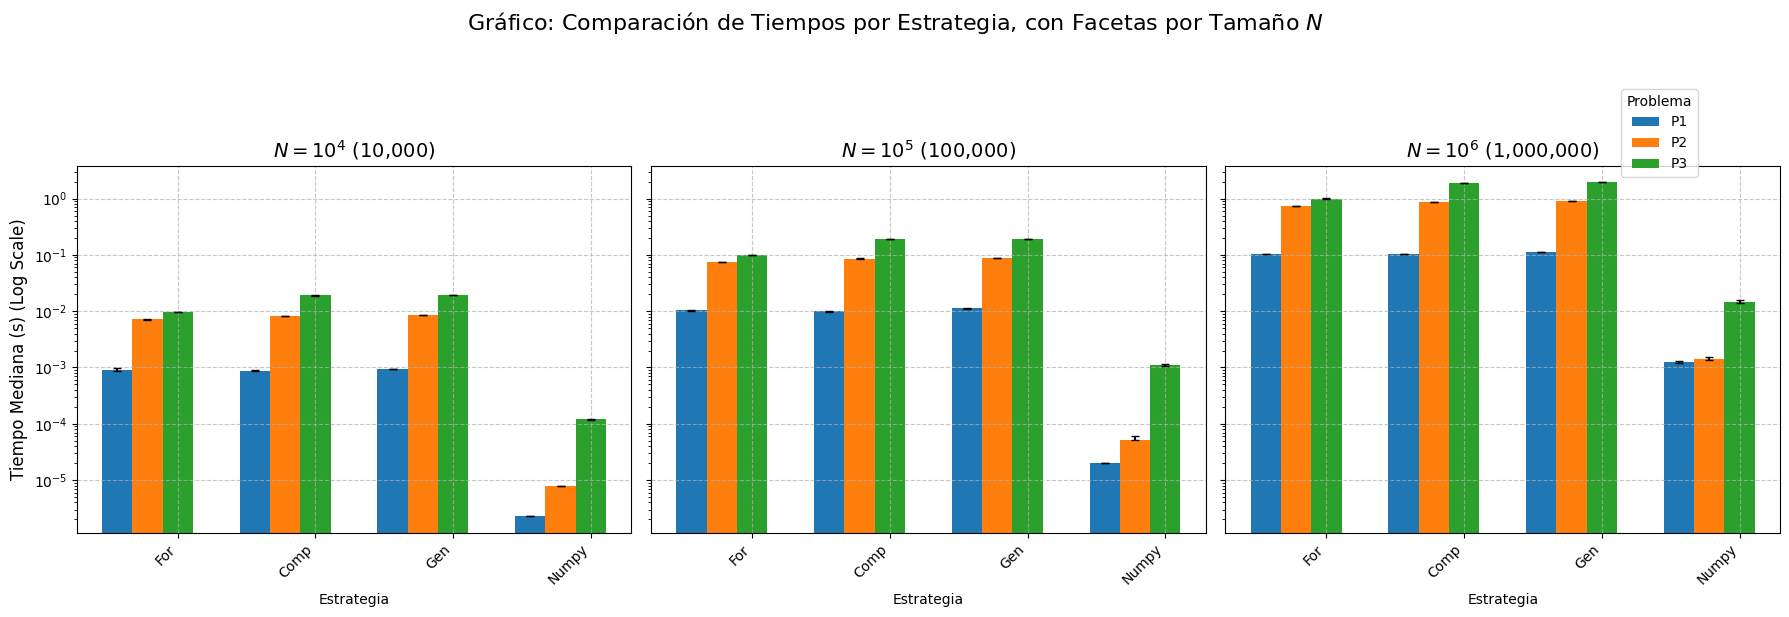

In [18]:
import matplotlib.pyplot as plt 


# 1. Preparamos los datos y calculamos límites de error
df_plot = df_summary.copy()
df_plot['Error_Lower'] = df_plot['Median_Time_s'] - df_plot['P25_Time_s']
df_plot['Error_Upper'] = df_plot['P75_Time_s'] - df_plot['Median_Time_s']

# Definimos el orden para consistencia
orden_por_estrategia = ['For', 'Comp', 'Gen', 'Numpy']
orden_por_problema = ['P1', 'P2', 'P3']
df_plot['Strategy'] = pd.Categorical(df_plot['Strategy'], categories=orden_por_estrategia, ordered=True)
df_plot['Problem'] = pd.Categorical(df_plot['Problem'], categories=orden_por_problema, ordered=True)
df_plot = df_plot.sort_values(['N', 'Problem', 'Strategy'])

# Configuración de la figura con 3 subplots
N_values = sorted(df_plot['N'].unique())
fig, axes = plt.subplots(1, len(N_values), figsize=(18, 6), sharey=True) 

width = 0.22
x = np.arange(len(orden_por_estrategia)) 
y_ticks = [1e-6, 1e-4, 1e-2, 1.0]
y_labels = ['$10^{-6}$', '$10^{-4}$', '$10^{-2}$', '$10^{0}$']

# Bucle para generar cada panel, pues quier analizar también el cambio respecto a n
for i, n_val in enumerate(N_values):
    ax = axes[i]
    df_n = df_plot[df_plot['N'] == n_val]
    
    offset = -1.5 * width 
    
    # Bucle interno para graficar las barras por problema (P1, P2, P3)
    for problem in orden_por_problema:
        group = df_n[df_n['Problem'] == problem]
        
        y_median = group['Median_Time_s'].values
        y_err = group[['Error_Lower', 'Error_Upper']].values.T

        # Dibujamos la barra con error P25-P75
        ax.bar(x + offset, y_median, width, yerr=y_err, capsize=3, label=problem if i == 0 else "") 
        offset += width

    # Ajusto ejes y títulos
    ax.set_yscale('log')
    ax.set_title(f'$N = 10^{{{int(np.log10(n_val))}}}$ ({n_val:,})', fontsize=14)
    ax.set_xticks(x + width*0.5)
    ax.set_xticklabels(orden_por_estrategia, rotation=45, ha='right')
    ax.set_xlabel('Estrategia')
    
    # Solo configuramos el eje Y en el primer subplot, pues es el que se comparte
    if i == 0:
        ax.set_ylabel('Tiempo Mediana (s) (Log Scale)', fontsize=12)
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_labels)
    ax.grid(True, which="major", ls="--", alpha=0.7)

# Leyenda y Título General
fig.legend(title='Problema', loc='upper right', bbox_to_anchor=(0.95, 0.9))
fig.suptitle('Gráfico: Comparación de Tiempos por Estrategia, con Facetas por Tamaño $N$', fontsize=16, y=1.02)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.savefig("faceted_bar_chart_p123_by_N.png")

#### Análisis
Primeramente, se pueden observar en la imagen tres páneles, los cuales muestran estadísticas conforme al cambio en N, que es el tamaño del vector de elementos analizados. Dentro de cada pánel, el eje y mide la mediana de tiempo (en escala logarítmica para hacer más visibles los cambios) que tomó la ejecución de cada uno de los problemas con cada una de las estrategias (for, list comprehension, generator y numpy), los cuales están representados en el eje x.

Analizando las figuras, se puede comprobar primeramente que la complejidad de los problemas se refleja en la mediana de los tiempos registrados: el tercer problema en promedio toma más tiempo que el segundo, y el segundo más que el primero (lo esperado por la complejidad de los problemas). 

Ahora, de acuerdo a la escalabilidad con N, en las tres primeras estrategias (Python Puro) se ve que la complejidad o tiempo tomado aumenta de forma lineal O(N), pues la altura de las barras en estos grupos es consistentemente proporcional al tamaño del vector en los tres paneles. La estrategia de NumPy contrasta con el resto, siendo la solución óptima: mientras que los tiempos de Python Puro aumentan linealmente, el tiempo de ejecución de NumPy se mantiene en un nivel cercano a constante a medida que N aumenta, lo que lo convierte en el método con la mejor escalabilidad.

---
### Boxplot


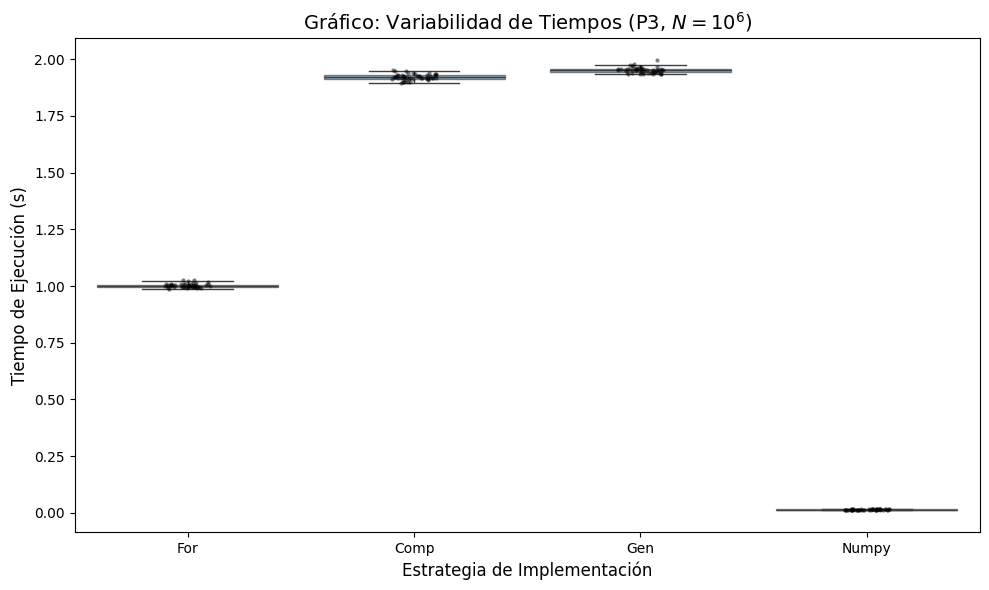

In [19]:
import seaborn as sns

# Ajusto el DataFrame para el Problema 3 y N=1,000,000 (un ejemplo específico representativo)
df_box = df_raw[(df_raw['N'] == 1000000) & (df_raw['Problem'] == 'P3')].copy()

# Creo el boxplot con stripplot (puntos individuales)
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplot
sns.boxplot(x='Strategy', y='Time_s', data=df_box, ax=ax, whis=1.5,
            showfliers=False, # Oculta outliers por defecto para usar el stripplot
            boxprops={'alpha': 0.6})

# Stripplot para mostrar los 50 puntos de datos individuales
sns.stripplot(x='Strategy', y='Time_s', data=df_box, ax=ax, color='black', size=3, alpha=0.5, jitter=True)

# Ajusto visualización
ax.set_ylabel('Tiempo de Ejecución (s)', fontsize=12)
ax.set_xlabel('Estrategia de Implementación', fontsize=12)
ax.set_title('Gráfico: Variabilidad de Tiempos (P3, $N=10^6$)', fontsize=14)

plt.tight_layout()
plt.savefig("boxplot_p3_n1M.png")

#### Análisis
En primer lugar, la gráfica nos muestra el registro de 50 tiempos para cada una de las estrategias usadas en el problema 3 para el tamaño del vector de datos N=1000000. El eje y mide el tiempo en segundos y el eje x indica la estrategia usada. 

Ahora, la distribución de NumPy es una franja delgada y baja (cerca de 10−4 a 10−3 s), mientras que las distribuciones de Python (For, List Comprehension, Generator) están cerca de 1 o 2 segundos. Esto reafirma que la vectorización no sólo es más rápida, sino que es varios órdenes de magnitud más rápida incluso en el peor caso de Python.

Por otro lado, las cajas y los bigotes para las estrategias For, Comp y Gen son muy estrechas en relación con el valor de la mediana. De igual forma, en este escenario complejo (P3), se nota que el bucle for puro tiene una distribución de tiempo ligeramente más baja (más rápida) que las de Comp y Gen, aunque la diferencia es mínima.

Dicho lo anterior, este gráfico nos permite visualizar qué opción es más rápida (NumPy) así como qué estrategia usar si quiero que los resultados se distribuyan en un rango menor entre cuartiles, para lo cual NumPy también muestra una estabilidad de resultados, seguido de la estrategia For. 

---
### Curvas de escalamiento



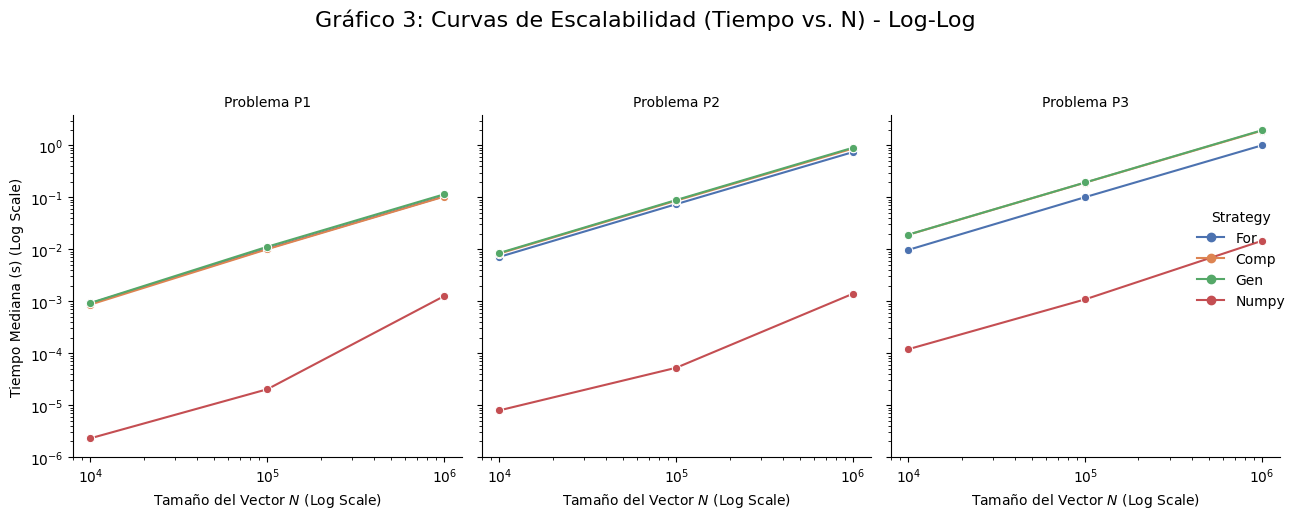

In [ ]:
# Creo la gráfica de relaciones con facetas
g = sns.relplot(
    data=df_summary,
    x='N',
    y='Median_Time_s',
    col='Problem', # Separo en paneles para los problemas
    hue='Strategy',
    kind='line',
    marker='o',
    height=5,
    aspect=0.8,
    palette='deep'
)

# Establezco escala log-log
g.set(xscale="log", yscale="log")

# Ajusto etiquetas de eje X (para mostrar 10^4, 10^5, 10^6)
N_values = df_summary['N'].unique()
N_labels = [f'$10^{{{int(np.log10(n))}}}$' for n in N_values]
g.set(xticks=N_values, xticklabels=N_labels)

# Ajusto etiquetas de eje Y (muestro 10^-6 a 10^0)
y_ticks = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
y_labels = ['$10^{-6}$', '$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$']
g.set(yticks=y_ticks, yticklabels=y_labels)

# Títulos y leyendas
g.fig.suptitle('Gráfico: Curvas de Escalabilidad (Tiempo vs. N) - Log-Log', fontsize=16, y=1.03)
g.set_axis_labels('Tamaño del Vector $N$ (Log Scale)', 'Tiempo Mediana (s) (Log Scale)')
g.set_titles(col_template='Problema {col_name}', fontsize=12)

g.fig.tight_layout(rect=[0, 0, 1, 0.96])
g.savefig("scaling_curve_log_log.png")

**Análisis**
Esta gráfica representa Curvas de Escalabilidad que utilizan una escala log-log para mostrar la relación entre la mediana del tiempo de ejecución (eje Y) y el tamaño del vector N (eje X), con paneles separados para cada problema. El análisis de esta gráfica confirma las diferentes complejidades algorítmicas de las estrategias.

El análisis de las curvas demuestra que el código Python puro (estrategias For, List Comprehension, y Generator) se comporta con una complejidad lineal O(N), ya que sus líneas presentan una pendiente constante y proporcional al tamaño del vector N. Por otro lado, la estrategia de NumPy exhibe una escalabilidad diferente. La pendiente de las curvas de escabilidad aumenta mientras N aumenta. Es claro que siempre muestra un tiempo mucho menor a las demás estrategias pero es interesante que su proporción tiempo-N aumenta en el segundo bloque de complejidad.

Dicho lo anterior, si la prioridad de ejecución se basa en el tiempo, es claro que la estrategia usando NumPy es la mejor; sin embargo, si ante todo se busca un comportamiento lineal en cuanto a la escalabilidad con N pues se prioriza la certeza en cuanto al comportamiento tiempo-N, quizá es mejor considerar algún método de Python Puro (como For).

Por último, comparando los páneles, dicho cambio en la pendiente de las curvas de NumPy es más notorio en el primer problema que en el tercero. Esto puede deberse a que, desde el primer tamaño de N, en el problema 3 ya se preveé una ejecución demandante y por lo tanto el sistema está preparado para no cambiar demasiado ante la escalabilidad de N.



---
### Heatmap de razones


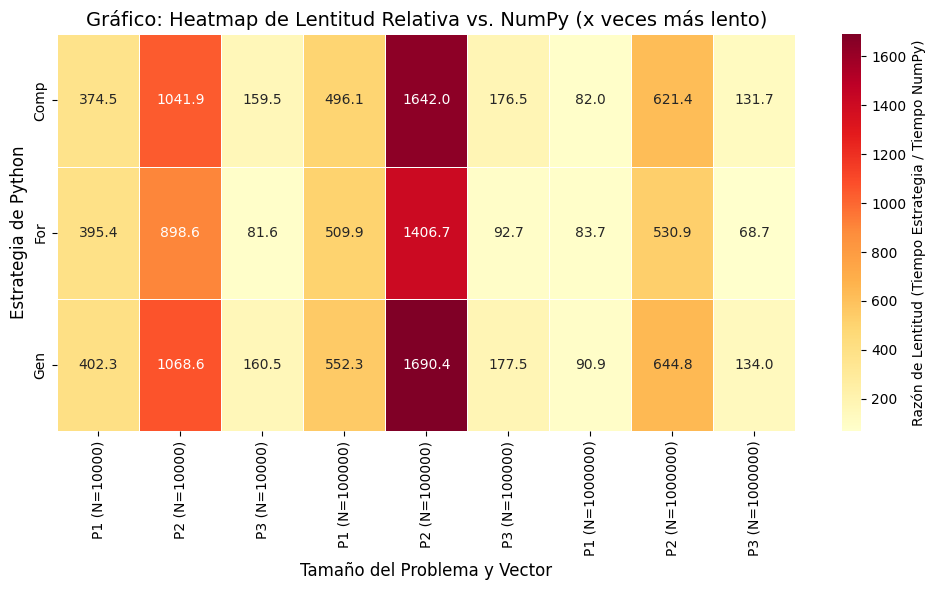

In [ ]:
# Obtengo los tiempos de NumPy para calcular la razón
df_ratios = df_summary.copy()
df_numpy = df_ratios[df_ratios['Strategy'] == 'Numpy'][['N', 'Problem', 'Median_Time_s']].rename(
    columns={'Median_Time_s': 'Numpy_Time_s'}
)

# Fusiono y calculo razónd e lentitud
df_ratios = df_ratios.merge(df_numpy, on=['N', 'Problem'], how='left')
df_ratios['Relative_Slowness'] = df_ratios['Median_Time_s'] / df_ratios['Numpy_Time_s']

# Filtro NumPy (la razón sería 1) y se pivotea a formato de matriz
df_heatmap_data = df_ratios[df_ratios['Strategy'] != 'Numpy'].copy()

heatmap_matrix = df_heatmap_data.pivot_table(
    index=['N', 'Problem'],
    columns='Strategy',
    values='Relative_Slowness'
)

# Ajusto el índice y transpongo para mejor visualización
heatmap_matrix = heatmap_matrix.sort_index(level='N')
index_labels = [f"{prob} (N={N})" for N, prob in heatmap_matrix.index]
heatmap_matrix.index = index_labels
heatmap_matrix = heatmap_matrix.T # Estrategias en filas, problemas/N en columnas

# Heatmap se crea
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(
    heatmap_matrix,
    annot=True,
    fmt=".1f", # Mostrar 1 decimal (ej. 130.5)
    cmap="YlOrRd", 
    linewidths=.5,
    cbar_kws={'label': 'Razón de Lentitud (Tiempo Estrategia / Tiempo NumPy)'}
)

ax.set_title('Gráfico: Heatmap de Lentitud Relativa vs. NumPy (x veces más lento)', fontsize=14)
ax.set_xlabel('Tamaño del Problema y Vector', fontsize=12)
ax.set_ylabel('Estrategia de Python', fontsize=12)

plt.tight_layout()
plt.savefig("heatmap_relative_slowness.png")

**Análisis**
Este es un Mapa de Calor (Heatmap) que cuantifica la penalidad de rendimiento del código Python puro (estrategias For, Generator y List Comprehension) en comparación con la vectorización de NumPy. La gráfica se organiza con las Estrategias de Python en el eje vertical y las combinaciones de problema y tamaño del vector (N) en el eje horizontal. La intensidad del color (la barra lateral indica la magnitud, siendo el color más oscuro el mayor valor) y el número dentro de cada celda representan la Razón de Lentitud, que es el número de veces que la estrategia de Python puro es más lenta que la correspondiente solución vectorizada de NumPy (Tiempo Estrategia/Tiempo NumPy).

Esta matriz permite visualizar un mapeo completo sobre qué estrategia es la mejor (priorizando el tiempo) de acuerdo al tamaño de tu volumen de datos y el problema que quieres resolver. Por un lado, es visible que las mayores lentitudes se registran en el Problema 2, donde se alcanzaron niveles de aproximadamente 1500 veces más lento que NumPy para N=100000, lo cual es algo interesante, pues es el problema con un nivel de complejidad media, lo que significa que es para esta complejidad que se encuentran las mayores diferencias en tiempos, lo que en mi opinión se explica por una elevada eficiencia gracias a la vectorización de NumPy. Por otro lado, en toda la tabla es visible cómo el For es el que generalmente (con excepción del Problema 1, donde le gana List Comprehension) tiende a tener una menor ralentización con respecto al tiempo de NumPy, y es el la estrategia Generator donde se registran las mayores diferencias de tiempo en todos los casos.

En resumen, el heatmap es la prueba más contundente de que la vectorización de NumPy es una necesidad absoluta para cualquier procesamiento de datos a gran escala. La consistencia de las filas horizontales entre For, Comp y Gen también reitera que el cambio de sintaxis de bucle en Python no ofrece ninguna ventaja de rendimiento significativa, ya que el cuello de botella es la naturaleza interpretada del código secuencial.